In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns' , 500)
pd.set_option('display.max_row',100)

In [12]:
data = pd.read_csv(r"D:\Hack\HACK2\train_fashion.csv")

In [13]:
data.head()

,Order_Ref_Number,Order_Placed_AT,Order_Delivered_Date,Product_Ref_ID,Size,Color_Code,Product_Category_Reference,Cost_to_Customer(USD),Customer_ID,Gender,Customer_BirthDate,Customer_Location,Customer_Joining_Date,Order_Repeat_Chance
0,98981,2016-09-10,2016-09-11,897,l,grey,33,19.9,48040,Mrs,1960-05-30,Hamburg,2015-02-17,0
1,69825,2016-08-15,2016-08-20,1557,xl,petrol,31,89.9,42892,Mrs,1958-09-23,Lower Saxony,2015-11-14,1
2,9929,2016-06-27,2016-07-02,292,4+,grey,4,64.9,32479,Mrs,1961-09-19,Hesse,2016-06-28,0
3,75600,2016-08-21,2016-08-22,1445,xxl,grey,29,59.9,4216,Mrs,1952-10-01,Lower Saxony,2015-02-17,0
4,95622,2016-09-06,2016-09-07,1415,m,mahagoni,3,21.9,39571,Mrs,1963-10-30,North Rhine-Westphalia,2015-10-02,0


In [14]:
data.shape

(75000, 14)

In [15]:
data.describe()

,Order_Ref_Number,Product_Ref_ID,Product_Category_Reference,Cost_to_Customer(USD),Customer_ID,Order_Repeat_Chance
count,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000
mean,50002.922613,924.275213,30.173093,65.232934,27164.660547,0.459933
std,28883.591717,702.739285,28.190524,48.291431,14043.973668,0.498395
min,1.000000,1.000000,1.000000,0.000000,9.000000,0.000000
25%,24976.750000,214.000000,5.000000,29.900000,14943.000000,0.000000
50%,50042.500000,812.000000,25.000000,49.900000,31185.000000,0.000000
75%,75038.250000,1582.000000,44.000000,79.900000,38924.000000,1.000000
max,99999.000000,2241.000000,138.000000,999.000000,48241.000000,1.000000


In [16]:
data.Order_Repeat_Chance.value_counts()

0    40505
1    34495
Name: Order_Repeat_Chance, dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order_Ref_Number            75000 non-null  int64  
 1   Order_Placed_AT             75000 non-null  object 
 2   Order_Delivered_Date        67979 non-null  object 
 3   Product_Ref_ID              75000 non-null  int64  
 4   Size                        75000 non-null  object 
 5   Color_Code                  75000 non-null  object 
 6   Product_Category_Reference  75000 non-null  int64  
 7   Cost_to_Customer(USD)       75000 non-null  float64
 8   Customer_ID                 75000 non-null  int64  
 9   Gender                      75000 non-null  object 
 10  Customer_BirthDate          68445 non-null  object 
 11  Customer_Location           75000 non-null  object 
 12  Customer_Joining_Date       75000 non-null  object 
 13  Order_Repeat_Chance         750

## checking null value in data

In [18]:
data.isnull().sum()

Order_Ref_Number                 0
Order_Placed_AT                  0
Order_Delivered_Date          7021
Product_Ref_ID                   0
Size                             0
Color_Code                       0
Product_Category_Reference       0
Cost_to_Customer(USD)            0
Customer_ID                      0
Gender                           0
Customer_BirthDate            6555
Customer_Location                0
Customer_Joining_Date            0
Order_Repeat_Chance              0
dtype: int64

In [19]:
# data.Color_Code.value_counts()

In [20]:
data.Color_Code = data.Color_Code.replace({'?':"black"})

## cleaning Gender column

In [24]:
data.Gender.value_counts()

Mrs             71614
Mr               2903
Family            307
Company            88
not reported       88
Name: Gender, dtype: int64

In [25]:
data.shape

(75000, 14)

In [26]:
data.Gender.replace({"Family":"Mr"}, inplace=True)
data.Gender.replace({"Company":"Mr"}, inplace=True)
data.Gender.replace({"not reported":"Mr"},inplace = True)

In [27]:
data.Gender.value_counts()

Mrs    71614
Mr      3386
Name: Gender, dtype: int64

## cleaning Size chart

In [311]:
data.Size = data.Size.str.replace("+","")

In [312]:
data.Size = data.Size.replace({"xs":38})
data.Size = data.Size.replace({"s":39})
data.Size = data.Size.replace({"m":41})
data.Size = data.Size.replace({"l":42})
data.Size = data.Size.replace({"xl":44})
data.Size = data.Size.replace({"xxl":46})
data.Size = data.Size.replace({"xxxl":48})
data.Size = data.Size.replace({"unsized":42})

In [313]:
data.Size  = data.Size.astype("int")

##  droping inseginificant columns

In [314]:
data.head()

,Order_Ref_Number,Order_Placed_AT,Order_Delivered_Date,Product_Ref_ID,Size,Color_Code,Product_Category_Reference,Cost_to_Customer(USD),Customer_ID,Gender,Customer_BirthDate,Customer_Location,Customer_Joining_Date,Order_Repeat_Chance
0,98981,2016-09-10,2016-09-11,897,42,grey,33,19.9,48040,Mrs,1960-05-30,Hamburg,2015-02-17,0
1,69825,2016-08-15,2016-08-20,1557,44,petrol,31,89.9,42892,Mrs,1958-09-23,Lower Saxony,2015-11-14,1
2,9929,2016-06-27,2016-07-02,292,4,grey,4,64.9,32479,Mrs,1961-09-19,Hesse,2016-06-28,0
3,75600,2016-08-21,2016-08-22,1445,46,grey,29,59.9,4216,Mrs,1952-10-01,Lower Saxony,2015-02-17,0
4,95622,2016-09-06,2016-09-07,1415,41,mahagoni,3,21.9,39571,Mrs,1963-10-30,North Rhine-Westphalia,2015-10-02,0


In [315]:
train=data.drop({"Order_Ref_Number", "Product_Ref_ID" , "Customer_BirthDate","Customer_Joining_Date","Order_Placed_AT" ,"Order_Delivered_Date"}, axis = 1)

In [316]:
train["or_Month"] = pd.to_datetime(data["Order_Placed_AT"]).dt.month

train["or_Day"] = pd.to_datetime(data["Order_Placed_AT"]).dt.day

train["del_Month"] = pd.to_datetime(data["Order_Delivered_Date"]).dt.month

train["del_Day"] = pd.to_datetime(data["Order_Delivered_Date"]).dt.day

In [317]:
train["del_Day"] = train["del_Day"].fillna(train["del_Day"].median())
train["del_Month"] = train["del_Month"].fillna(train["del_Month"].median())

In [318]:
train.isnull().sum()

Size                          0
Color_Code                    0
Product_Category_Reference    0
Cost_to_Customer(USD)         0
Customer_ID                   0
Gender                        0
Customer_Location             0
Order_Repeat_Chance           0
or_Month                      0
or_Day                        0
del_Month                     0
del_Day                       0
dtype: int64

In [319]:
train.head()

,Size,Color_Code,Product_Category_Reference,Cost_to_Customer(USD),Customer_ID,Gender,Customer_Location,Order_Repeat_Chance,or_Month,or_Day,del_Month,del_Day
0,42,grey,33,19.9,48040,Mrs,Hamburg,0,9,10,9.0,11.0
1,44,petrol,31,89.9,42892,Mrs,Lower Saxony,1,8,15,8.0,20.0
2,4,grey,4,64.9,32479,Mrs,Hesse,0,6,27,7.0,2.0
3,46,grey,29,59.9,4216,Mrs,Lower Saxony,0,8,21,8.0,22.0
4,41,mahagoni,3,21.9,39571,Mrs,North Rhine-Westphalia,0,9,6,9.0,7.0


## outlier check and remove

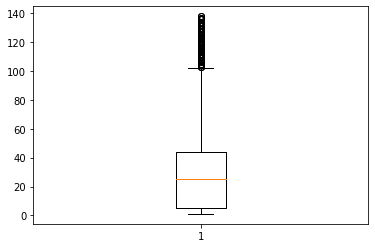

In [320]:
plt.boxplot(train["Product_Category_Reference"])
plt.show()

In [321]:
print(train['Product_Category_Reference'].quantile(0.10))
print(train['Product_Category_Reference'].quantile(0.90))

3.0
69.0


In [322]:
train["Product_Category_Reference"] = np.where(train["Product_Category_Reference"] <3.0, 3.0,train["Product_Category_Reference"])
train["Product_Category_Reference"] = np.where(train["Product_Category_Reference"] >69.0, 69.0,train["Product_Category_Reference"])

In [323]:
# index = train[(train['Product_Category_Reference'] >= 100)].index
# train.drop(index, inplace=True) 
# train['Product_Category_Reference'].describe()

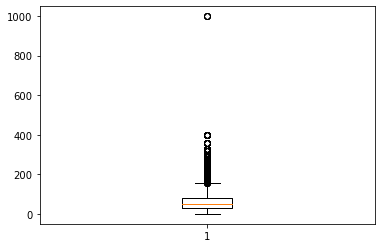

In [324]:
plt.boxplot(train["Cost_to_Customer(USD)"])
plt.show()

In [325]:
print(train['Cost_to_Customer(USD)'].quantile(0.10))
print(train['Cost_to_Customer(USD)'].quantile(0.90))

19.9
134.9


In [326]:
train["Cost_to_Customer(USD)"] = np.where(train["Cost_to_Customer(USD)"] <19.9, 19.9,train["Cost_to_Customer(USD)"])
train["Cost_to_Customer(USD)"] = np.where(train["Cost_to_Customer(USD)"] >134.9, 134.9,train["Cost_to_Customer(USD)"])

In [327]:
# index = train[(train['Cost_to_Customer(USD)'] >= 130)].index
# train.drop(index, inplace=True) 
# train['Cost_to_Customer(USD)'].describe()

In [328]:
# index = train[(train['Size'] >= 50) | (train['Size'] <=32)].index
# train.drop(index, inplace=True) 
# train['Size'].describe()

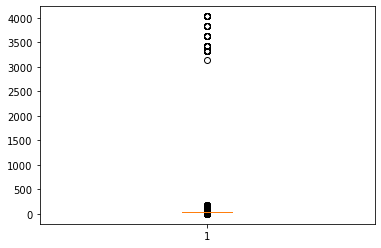

In [329]:
plt.boxplot(train["Size"])
plt.show()

In [330]:
print(train['Size'].quantile(0.10))
print(train['Size'].quantile(0.90))

37.0
46.0


In [331]:
train["Size"] = np.where(train["Size"] <37.0, 37.0,train["Size"])
train["Size"] = np.where(train["Size"] >46.0, 46.0,train["Size"])

In [332]:
train.isnull().sum()

Size                          0
Color_Code                    0
Product_Category_Reference    0
Cost_to_Customer(USD)         0
Customer_ID                   0
Gender                        0
Customer_Location             0
Order_Repeat_Chance           0
or_Month                      0
or_Day                        0
del_Month                     0
del_Day                       0
dtype: int64

In [333]:
train.shape

(75000, 12)

<AxesSubplot:>

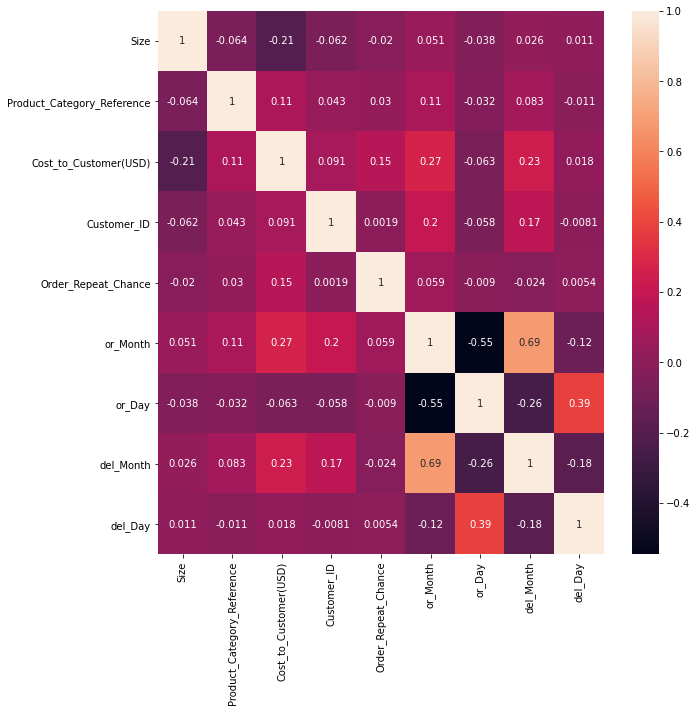

In [334]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot= True )

## label encoding

In [335]:
train["Cost_to_Customer(USD)"] = train["Cost_to_Customer(USD)"].astype(int)

In [336]:
train.head()

,Size,Color_Code,Product_Category_Reference,Cost_to_Customer(USD),Customer_ID,Gender,Customer_Location,Order_Repeat_Chance,or_Month,or_Day,del_Month,del_Day
0,42.0,grey,33.0,19,48040,Mrs,Hamburg,0,9,10,9.0,11.0
1,44.0,petrol,31.0,89,42892,Mrs,Lower Saxony,1,8,15,8.0,20.0
2,37.0,grey,4.0,64,32479,Mrs,Hesse,0,6,27,7.0,2.0
3,46.0,grey,29.0,59,4216,Mrs,Lower Saxony,0,8,21,8.0,22.0
4,41.0,mahagoni,3.0,21,39571,Mrs,North Rhine-Westphalia,0,9,6,9.0,7.0


In [337]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [338]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Size                        75000 non-null  float64
 1   Color_Code                  75000 non-null  object 
 2   Product_Category_Reference  75000 non-null  float64
 3   Cost_to_Customer(USD)       75000 non-null  int32  
 4   Customer_ID                 75000 non-null  int64  
 5   Gender                      75000 non-null  object 
 6   Customer_Location           75000 non-null  object 
 7   Order_Repeat_Chance         75000 non-null  int64  
 8   or_Month                    75000 non-null  int64  
 9   or_Day                      75000 non-null  int64  
 10  del_Month                   75000 non-null  float64
 11  del_Day                     75000 non-null  float64
dtypes: float64(4), int32(1), int64(4), object(3)
memory usage: 6.6+ MB


In [339]:
train[train.select_dtypes(include=['object']).columns] = train[train.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [340]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Size                        75000 non-null  float64
 1   Color_Code                  75000 non-null  int32  
 2   Product_Category_Reference  75000 non-null  float64
 3   Cost_to_Customer(USD)       75000 non-null  int32  
 4   Customer_ID                 75000 non-null  int64  
 5   Gender                      75000 non-null  int32  
 6   Customer_Location           75000 non-null  int32  
 7   Order_Repeat_Chance         75000 non-null  int64  
 8   or_Month                    75000 non-null  int64  
 9   or_Day                      75000 non-null  int64  
 10  del_Month                   75000 non-null  float64
 11  del_Day                     75000 non-null  float64
dtypes: float64(4), int32(4), int64(4)
memory usage: 5.7 MB


## Sampling

In [341]:
X = train.drop(["Order_Repeat_Chance", "Customer_Location"],axis=True)
Y = train[['Order_Repeat_Chance']]

In [342]:
from sklearn.model_selection import train_test_split
train_x , test_x , train_y , test_y = train_test_split( X , Y , test_size = .2 , random_state = 25)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(60000, 10)
(15000, 10)
(60000, 1)
(15000, 1)


# Model building

## logistic regression

In [343]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [344]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [345]:
model = logreg.fit(train_x, train_y)
#print("Model Fitted Successfully!!!")

In [346]:
pred_lr = model.predict(test_x)

In [347]:
tab1 = confusion_matrix(pred_lr, test_y)
print("Confusion Matrix:\n",tab1)
# evaluate predictions
acc1 = (accuracy_score(test_y, pred_lr))*100
print("\nAccuracy: %.2f%%\n" % acc1)
print(classification_report(test_y,pred_lr))

Confusion Matrix:
 [[6358 4801]
 [1721 2120]]

Accuracy: 56.52%

              precision    recall  f1-score   support

           0       0.57      0.79      0.66      8079
           1       0.55      0.31      0.39      6921

    accuracy                           0.57     15000
   macro avg       0.56      0.55      0.53     15000
weighted avg       0.56      0.57      0.54     15000



## RandomForestClassifier

In [348]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()      #(max_depth=6, min_samples_split=4,n_estimators=1000)

In [349]:
rf.fit(train_x , train_y)

RandomForestClassifier()

In [350]:
pred_rf = rf.predict(test_x)

In [351]:
tab2 = confusion_matrix(pred_rf, test_y)
print("Confusion Matrix:\n",tab2)
# evaluate predictions
acc2 = (accuracy_score(test_y, pred_rf))*100
print("\nAccuracy: %.2f%%\n" % acc2)
print(classification_report(test_y,pred_rf))

Confusion Matrix:
 [[5235 2644]
 [2844 4277]]

Accuracy: 63.41%

              precision    recall  f1-score   support

           0       0.66      0.65      0.66      8079
           1       0.60      0.62      0.61      6921

    accuracy                           0.63     15000
   macro avg       0.63      0.63      0.63     15000
weighted avg       0.63      0.63      0.63     15000



## xgboosting

In [352]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=6000,
                           max_depth=6,
                           learning_rate=0.04,
                           subsample=0.9,
                           colsample_bytree=0.35,
                           objective = 'binary:logistic',
                           random_state = 1
                           )


In [353]:
xgb.fit(train_x,train_y)
print("Model Fitted Successfully!!!")

[23:34:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Fitted Successfully!!!


In [354]:
pred_xgb = xgb.predict(test_x)

In [355]:
tab3 = confusion_matrix(pred_xgb, test_y)
print("Confusion Matrix:\n",tab3)
# evaluate predictions
acc3 = (accuracy_score(test_y, pred_xgb))*100
print("\nAccuracy: %.2f%%\n" % acc3)
print(classification_report(test_y,pred_xgb))

Confusion Matrix:
 [[5337 2525]
 [2742 4396]]

Accuracy: 64.89%

              precision    recall  f1-score   support

           0       0.68      0.66      0.67      8079
           1       0.62      0.64      0.63      6921

    accuracy                           0.65     15000
   macro avg       0.65      0.65      0.65     15000
weighted avg       0.65      0.65      0.65     15000



## light gradient boosting

In [356]:
from lightgbm import LGBMClassifier
# lgbm = LGBMClassifier(
#                            n_estimators=1000,
#                            max_depth=10,
#                            learning_rate=0.03,
#                            subsample=0.9,
#                            colsample_bytree=0.4,
#                            objective = 'binary',
#                            random_state = 1,
#                            importance_type='gain',
#                            reg_alpha=2,
#                            reg_lambda=2
#                            )
lgbm = LGBMClassifier()

In [357]:
pred_lgbm = lgbm.fit(train_x,train_y)
print("Model Fitted Successfully!!!")

Model Fitted Successfully!!!


In [358]:
pred_lgbm = lgbm.predict(test_x)

In [359]:
tab4 = confusion_matrix(pred_lgbm, test_y)
print("Confusion Matrix:\n",tab4)
# evaluate predictions
acc4 = (accuracy_score(test_y, pred_lgbm))*100
print("\nAccuracy: %.2f%%\n" % acc4)
print(classification_report(test_y,pred_lgbm))

Confusion Matrix:
 [[4837 2120]
 [3242 4801]]

Accuracy: 64.25%

              precision    recall  f1-score   support

           0       0.70      0.60      0.64      8079
           1       0.60      0.69      0.64      6921

    accuracy                           0.64     15000
   macro avg       0.65      0.65      0.64     15000
weighted avg       0.65      0.64      0.64     15000



## gradient boosting

In [360]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [361]:
gbc.fit(train_x,train_y)
print("Model Fitted")

Model Fitted


In [362]:
pred_gbc = gbc.predict(test_x)

In [363]:
tab5 = confusion_matrix(pred_gbc, test_y)

In [364]:
print("Confusion Matrix:\n",tab5)
# evaluate predictions
acc5 = (accuracy_score(test_y, pred_gbc))*100
print("\nAccuracy: %.2f%%\n" % acc5)
print(classification_report(test_y,pred_gbc))

Confusion Matrix:
 [[4682 2141]
 [3397 4780]]

Accuracy: 63.08%

              precision    recall  f1-score   support

           0       0.69      0.58      0.63      8079
           1       0.58      0.69      0.63      6921

    accuracy                           0.63     15000
   macro avg       0.64      0.64      0.63     15000
weighted avg       0.64      0.63      0.63     15000



## KNN

In [365]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=35)

In [366]:
knn.fit(train_x,train_y)
print("Model Fitted")

Model Fitted


In [367]:
pred_knn = knn.predict(test_x)

In [368]:
tab6 = confusion_matrix(pred_knn, test_y)

In [369]:
print("Confusion Matrix:\n",tab6)
# evaluate predictions
acc6 = (accuracy_score(test_y, pred_knn))*100
print("\nAccuracy: %.2f%%\n" % acc6)
print(classification_report(test_y,pred_knn))

Confusion Matrix:
 [[5549 3995]
 [2530 2926]]

Accuracy: 56.50%

              precision    recall  f1-score   support

           0       0.58      0.69      0.63      8079
           1       0.54      0.42      0.47      6921

    accuracy                           0.56     15000
   macro avg       0.56      0.55      0.55     15000
weighted avg       0.56      0.56      0.56     15000



In [370]:
list1 = ['Logistic Regressio','RandForestClassifier','XGBoosting','LightGradientBoosting','GradientBoosting','Knn']
list2= [acc1,acc2,acc3,acc4,acc5,acc6]
accu = pd.DataFrame({"Techniques":list1,"Accuracy":list2})
accu.sort_values("Accuracy",ascending = False)

,Techniques,Accuracy
2,XGBoosting,64.886667
3,LightGradientBoosting,64.253333
1,RandForestClassifier,63.413333
4,GradientBoosting,63.080000
0,Logistic Regressio,56.520000
5,Knn,56.500000


## Feature selection

In [371]:
train.shape

(75000, 12)

In [372]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [373]:
from sklearn.feature_selection import RFE

In [374]:
rfe_gb = RFE(model,9)

In [375]:
rfe_gb.fit(X,Y)
print("Model Fitted Successfully!!!")

Model Fitted Successfully!!!


In [376]:
feature_importance = pd.DataFrame({"feature":(X.columns),"Importance":(rfe_gb.support_)})

feature_importance.sort_values("Importance", ascending = False)

,feature,Importance
0,Size,True
1,Color_Code,True
2,Product_Category_Reference,True
3,Cost_to_Customer(USD),True
5,Gender,True
6,or_Month,True
7,or_Day,True
8,del_Month,True
9,del_Day,True
4,Customer_ID,False


# test data

In [377]:
test = pd.read_csv(r"D:\Hack\HACK2\test_fashion1.csv")

In [378]:
test.head()

,Order_Ref_Number,Order_Placed_AT,Order_Delivered_Date,Product_Ref_ID,Size,Color_Code,Product_Category_Reference,Cost_to_Customer(USD),Customer_ID,Gender,Customer_BirthDate,Customer_Location,Customer_Joining_Date
0,75722,20-08-2016,23-08-2016,1745,13,blue,64,75.0,43916,Mrs,31-01-1975,Bavaria,21-08-2016
1,80185,24-08-2016,28-08-2016,1806,unsized,black,110,16.9,44684,Mrs,10-12-1969,Bavaria,17-02-2015
2,19865,30-06-2016,02-08-2016,22,l,green,14,19.9,34106,Mrs,18-01-1968,Thuringia,17-02-2015
3,76700,21-08-2016,24-08-2016,1683,l,blue,97,39.9,34160,Mrs,31-03-1961,Hesse,03-03-2016
4,92992,04-09-2016,06-09-2016,1500,l,petrol,11,69.9,11929,Mrs,02-06-1962,Baden-Wuerttemberg,23-04-2016


In [379]:
test.shape

(25000, 13)

In [380]:
test.Color_Code=test.Color_Code.replace({'?':"black"})

In [381]:
test.Gender.replace({"Family":"Mr"}, inplace=True)
test.Gender.replace({"Company":"Mr"}, inplace=True)
test.Gender.replace({"not reported":"Mr"},inplace = True)
test.Gender.value_counts()

Mrs    23815
Mr      1185
Name: Gender, dtype: int64

In [382]:
test.Size = test.Size.str.replace("+","")

In [383]:
test.Size = test.Size.replace({"xs":38})
test.Size = test.Size.replace({"s":39})
test.Size = test.Size.replace({"m":41})
test.Size = test.Size.replace({"l":42})
test.Size = test.Size.replace({"xl":44})
test.Size = test.Size.replace({"xxl":46})
test.Size = test.Size.replace({"xxxl":48})
test.Size = test.Size.replace({"unsized":42})

In [384]:
test.Size.isnull().sum()

0

In [385]:
test.Size = test.Size.astype("int")

In [386]:
test1  = test.drop({ "Customer_Location","Order_Ref_Number", "Product_Ref_ID" , "Customer_BirthDate","Customer_Joining_Date","Order_Placed_AT" ,"Order_Delivered_Date"}, axis = 1)

In [387]:
test1["or_Month"] = pd.to_datetime(test["Order_Placed_AT"]).dt.month

test1["or_Day"] = pd.to_datetime(test["Order_Placed_AT"]).dt.day

test1["del_Month"] = pd.to_datetime(test["Order_Delivered_Date"]).dt.month

test1["del_Day"] = pd.to_datetime(test["Order_Delivered_Date"]).dt.day

In [388]:
test1.shape

(25000, 10)

In [389]:
test1.isnull().sum()

Size                             0
Color_Code                       0
Product_Category_Reference       0
Cost_to_Customer(USD)            0
Customer_ID                      0
Gender                           0
or_Month                         0
or_Day                           0
del_Month                     2297
del_Day                       2297
dtype: int64

In [390]:
test1["del_Day"] = test1["del_Day"].fillna(train["del_Day"].median())
test1["del_Month"] = test1["del_Month"].fillna(train["del_Month"].median())

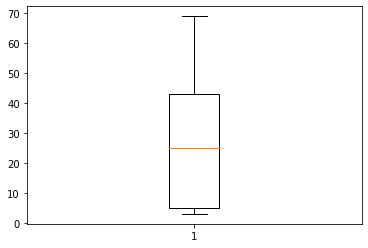

In [408]:
plt.boxplot(test1["Product_Category_Reference"])
plt.show()

In [392]:
print(test1['Product_Category_Reference'].quantile(0.10))
print(test1['Product_Category_Reference'].quantile(0.90))

3.0
69.0


In [393]:
test1["Product_Category_Reference"] = np.where(test1["Product_Category_Reference"] <3.0, 3.0,test1["Product_Category_Reference"])
test1["Product_Category_Reference"] = np.where(test1["Product_Category_Reference"] >69.0, 69.0,test1["Product_Category_Reference"])

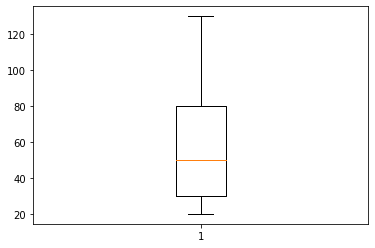

In [407]:
plt.boxplot(test1["Cost_to_Customer(USD)"])
plt.show()

In [395]:
print(test1['Cost_to_Customer(USD)'].quantile(0.10))
print(test1['Cost_to_Customer(USD)'].quantile(0.90))

19.9
129.9


In [396]:
test1["Cost_to_Customer(USD)"] = np.where(test1["Cost_to_Customer(USD)"] <19.9, 19.9,test1["Cost_to_Customer(USD)"])
test1["Cost_to_Customer(USD)"] = np.where(test1["Cost_to_Customer(USD)"] >129.9, 129.9,test1["Cost_to_Customer(USD)"])

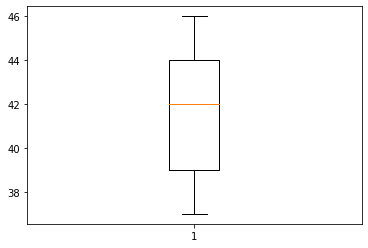

In [406]:
plt.boxplot(test1["Size"])
plt.show()

In [398]:
print(test1['Size'].quantile(0.10))
print(test1['Size'].quantile(0.90))

37.0
46.0


In [399]:
test1["Size"] = np.where(test1["Size"] <37.0, 37.0,test1["Size"])
test1["Size"] = np.where(test1["Size"] >46.0, 46.0,test1["Size"])

In [400]:
test1.shape

(25000, 10)

In [401]:
test1[test1.select_dtypes(include= ["object"]).columns] =test1[test1.select_dtypes(include= ["object"]).columns].apply(le.fit_transform)


In [402]:
test1.head()

,Size,Color_Code,Product_Category_Reference,Cost_to_Customer(USD),Customer_ID,Gender,or_Month,or_Day,del_Month,del_Day
0,37.0,19,64.0,75.0,43916,1,8,20,8.0,23.0
1,42.0,17,69.0,19.9,44684,1,8,24,8.0,28.0
2,42.0,45,14.0,19.9,34106,1,6,30,2.0,8.0
3,42.0,19,69.0,39.9,34160,1,8,21,8.0,24.0
4,42.0,64,11.0,69.9,11929,1,4,9,6.0,9.0


In [403]:
pred_value = xgb.predict(test1)

In [404]:
sub = pd.DataFrame({"Order_Ref_Number":test.Order_Ref_Number , "Order_Repeat_Chance":pred_value})

In [405]:
sub.head()

,Order_Ref_Number,Order_Repeat_Chance
0,75722,1
1,80185,0
2,19865,0
3,76700,0
4,92992,0


In [298]:
sub.to_csv(r"D:\Hack\hack2\sub9.csv" ,  index = False)